In [ ]:
import tensorflow as tf
import pandas as pd
import matplotlib as mp
import cv2
import imghdr
import os
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
data_dir = '/data'
image_exts = ['jpeg','jpg', 'bmp', 'png']
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

NameError: name 'os' is not defined

In [ ]:
data = tf.keras.utils.image_dataset_from_directory('/data')

Found 1988 files belonging to 2 classes.


In [ ]:
data_iterator = data.as_numpy_iterator()

In [ ]:
batch = data_iterator.next()

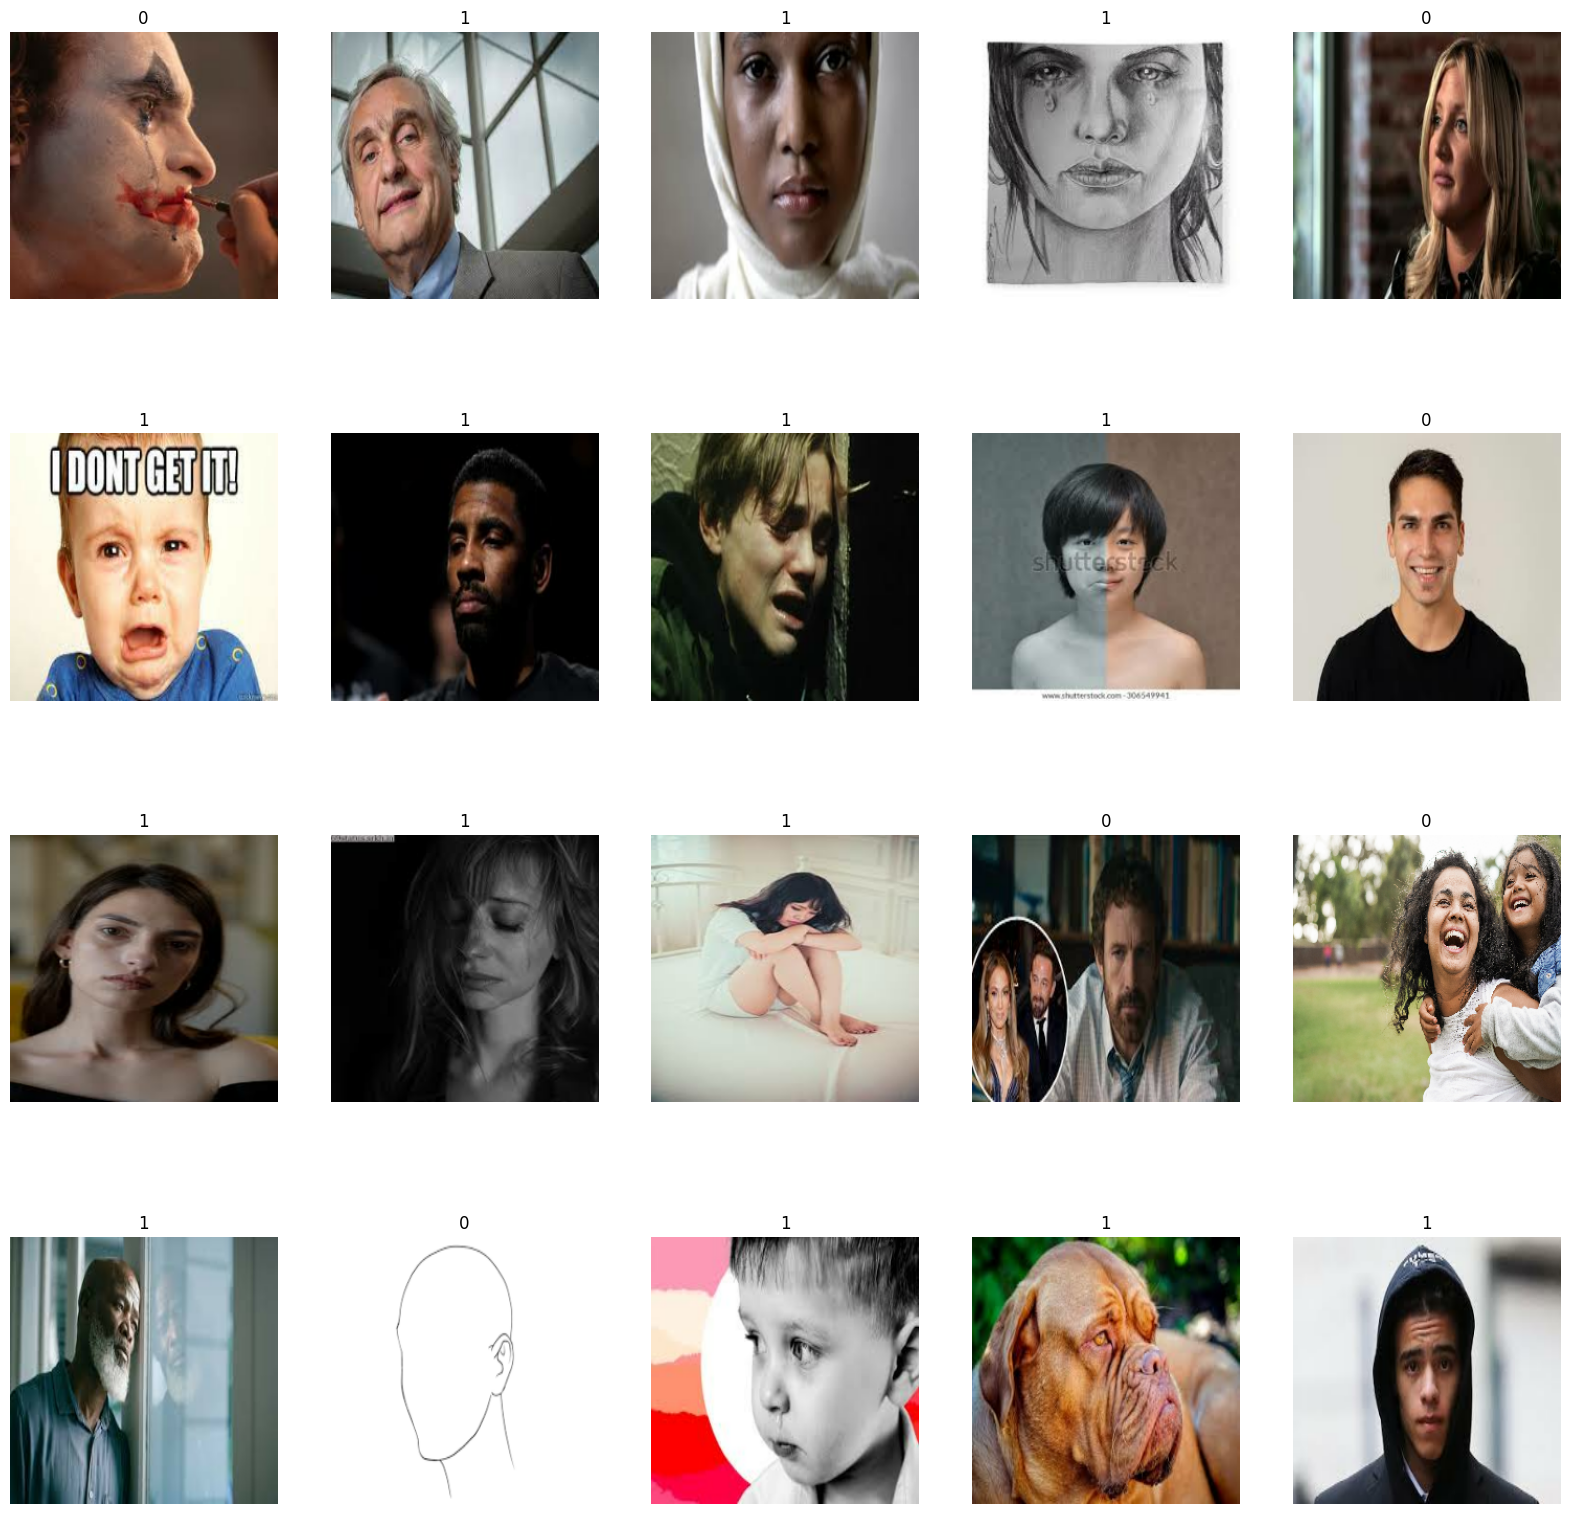

In [ ]:
fig, ax = plt.subplots(ncols=5, nrows=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:20]):
    ax[idx//5, idx%5].imshow(img.astype(int))
    ax[idx//5, idx%5].title.set_text(batch[1][idx])
    ax[idx//5, idx%5].axis('off')

In [ ]:
data = data.map(lambda x,y: (x/255,y))

In [ ]:
data.as_numpy_iterator().next()

(array([[[[0.25099573, 0.3764859 , 0.45883885],
          [0.25490198, 0.38039216, 0.4627451 ],
          [0.25497857, 0.38046876, 0.4628217 ],
          ...,
          [0.19607843, 0.33333334, 0.4117647 ],
          [0.19607843, 0.33333334, 0.41951594],
          [0.19607843, 0.33333334, 0.41960785]],
 
         [[0.2535058 , 0.37899598, 0.46134892],
          [0.25490198, 0.38039216, 0.4627451 ],
          [0.25497857, 0.38046876, 0.4628217 ],
          ...,
          [0.19612765, 0.33338255, 0.4118139 ],
          [0.19607843, 0.33333334, 0.41951594],
          [0.19607843, 0.33333334, 0.41960785]],
 
         [[0.25490814, 0.38039836, 0.4627513 ],
          [0.25648743, 0.38197765, 0.46433058],
          [0.25656402, 0.38205424, 0.46440718],
          ...,
          [0.1977405 , 0.33499542, 0.4134268 ],
          [0.19609702, 0.3333519 , 0.4195345 ],
          [0.19607843, 0.33333334, 0.41960785]],
 
         ...,
 
         [[0.29803923, 0.42745098, 0.5019608 ],
          [0.29808

In [ ]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D , Dense , Flatten , Dropout

In [ ]:
model = Sequential()

model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile('adam',loss = tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 30, 30, 16)       

In [ ]:
logdir = 'logs'

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logdir)

In [ ]:
hist = model.fit(train,epochs=30,validation_data=val,callbacks=[tensorboard_callback])

Epoch 1/30
44/44 [==============================] - 108s 2s/step - loss: 0.7456 - accuracy: 0.5263 - val_loss: 0.6620 - val_accuracy: 0.6276
Epoch 2/30
44/44 [==============================] - 129s 3s/step - loss: 0.6767 - accuracy: 0.5810 - val_loss: 0.6715 - val_accuracy: 0.6146
Epoch 3/30
44/44 [==============================] - 129s 3s/step - loss: 0.6595 - accuracy: 0.6321 - val_loss: 0.6470 - val_accuracy: 0.6589
Epoch 4/30
44/44 [==============================] - 129s 3s/step - loss: 0.6211 - accuracy: 0.6747 - val_loss: 0.6354 - val_accuracy: 0.6120
Epoch 5/30
44/44 [==============================] - 111s 2s/step - loss: 0.5770 - accuracy: 0.7216 - val_loss: 0.5918 - val_accuracy: 0.6562
Epoch 6/30
44/44 [==============================] - 130s 3s/step - loss: 0.5136 - accuracy: 0.7514 - val_loss: 0.5652 - val_accuracy: 0.7188
Epoch 7/30
44/44 [==============================] - 130s 3s/step - loss: 0.4003 - accuracy: 0.8210 - val_loss: 0.5618 - val_accuracy: 0.7057
Epoch 8/30
44

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [ ]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [ ]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y,yhat)
    re.update_state(y,yhat)
    acc.update_state(y,yhat)

1/1 [==============================] - 0s 496ms/step


In [ ]:
print(pre.result(), re.result(),acc.result())

tf.Tensor(0.7383177, shape=(), dtype=float32) tf.Tensor(0.75961536, shape=(), dtype=float32) tf.Tensor(0.7239583, shape=(), dtype=float32)


In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model.save(os.path.join('imageclassifier.h5'))

NameError: name 'model' is not defined

In [ ]:
new_model = load_model('imageclassifier.h5')

<function matplotlib.pyplot.show(close=None, block=None)>

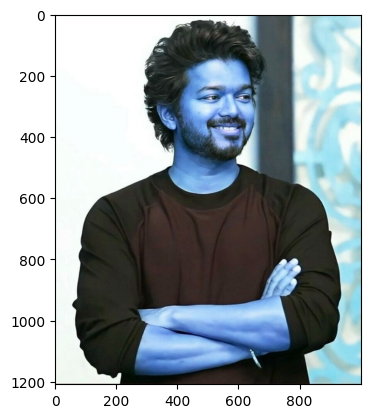

In [ ]:
img = cv2.imread('3.jpg')
plt.imshow(img)
plt.show

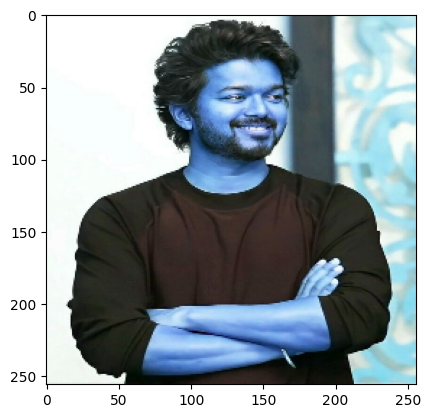

In [ ]:
resize = tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
yhat = new_model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 57ms/step


In [ ]:
if yhat > 0.5:
    print (f'Predicted Class is Sad Face')
else:
    print (f'Predicted Class is Happy Face')

Predicted Class is Happy Face


In [ ]:
yhat

array([[8.5167325e-05]], dtype=float32)